In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time  # To measure training time

In [11]:
# Scikit-learn and Imblearn (CPU)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler

In [12]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [13]:
# --- Configuration ---
TRAIN_CSV_PATH = 'exoTrain.csv'
TEST_CSV_PATH = 'exoTest.csv'
RANDOM_STATE = 42

# --- Visualization Function ---
def plot_light_curve(dataset, row_idx, title=None):
    """Plot flux values for a single star sample."""
    flux_values = dataset.drop('LABEL', axis=1).iloc[row_idx].values
    plt.figure(figsize=(15, 4))
    plt.plot(np.arange(len(flux_values)), flux_values, color='black')
    plt.xlabel("Time")
    plt.ylabel(f"Flux (Row {row_idx})")
    plt.title(title or "Light Curve - Flux over Time")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [14]:
# --- Data Loading ---
def load_data(train_path, test_path):
    try:
        print(f"Loading training data from: {train_path}")
        df_train = pd.read_csv(train_path)
        print(f"Loading testing data from: {test_path}")
        df_test = pd.read_csv(test_path)
        print("Data loaded successfully.")
        return df_train, df_test
    except FileNotFoundError:
        print("Error: One or both files not found. Please check paths:")
        print(f"- Train path: {train_path}")
        print(f"- Test path: {test_path}")
        return None, None
    except Exception as e:
        print(f"An error occurred during data loading: {e}")
        return None, None

In [15]:
# --- Data Preprocessing (CPU) ---
def preprocess_and_scale_cpu(df_train, df_test):
    print("Preprocessing data (CPU steps)...")
    X_train_raw = df_train.drop('LABEL', axis=1)
    y_train_raw = df_train['LABEL']
    X_test_raw = df_test.drop('LABEL', axis=1)
    y_test_raw = df_test['LABEL']

    y_train = (y_train_raw - 1).astype(int).values
    y_test = (y_test_raw - 1).astype(int).values

    print(f"Original training set shape: {X_train_raw.shape}")
    print(f"Original test set shape: {X_test_raw.shape}")
    print(f"Training labels distribution:\n{pd.Series(y_train).value_counts()}")
    print(f"Test labels distribution:\n{pd.Series(y_test).value_counts()}")

    print("Scaling features using StandardScaler (CPU)...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_raw.values)
    X_test_scaled = scaler.transform(X_test_raw.values)

    print("CPU Preprocessing and Scaling complete.")
    return scaler, X_train_scaled, y_train, X_test_scaled, y_test

In [16]:
# --- Oversampling (CPU) ---
def oversample_cpu(X_train_scaled, y_train):
    print("Oversampling training data using RandomOverSampler (CPU)...")
    oversampler = RandomOverSampler(sampling_strategy='auto', random_state=RANDOM_STATE)
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)
    print(f"Training data shape after oversampling: {X_train_resampled.shape}")
    print(f"Training labels distribution after oversampling:\n{pd.Series(y_train_resampled).value_counts()}")
    return X_train_resampled, y_train_resampled

In [17]:
# --- Model Training (CPU) ---
def train_logistic_regression(X_train_processed, y_train_processed):
    print("Training Logistic Regression model (CPU - scikit-learn)...")
    model = LogisticRegression(max_iter=1000,
                               random_state=RANDOM_STATE,
                               solver='liblinear',
                               C=1.0,
                               penalty='l2',
                               fit_intercept=True,
                               tol=1e-4)
    start_time = time.time()
    model.fit(X_train_processed, y_train_processed)
    end_time = time.time()
    print(f"CPU Training completed in {end_time - start_time:.2f} seconds.")
    return model

In [18]:
# --- Model Evaluation (CPU) ---
def evaluate_model(model, X_test_scaled, y_test, model_name="Model"):
    print(f"\n--- Evaluating {model_name} ---")
    try:
        print("Predicting on test data (CPU)...")
        start_time = time.time()
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        end_time = time.time()
        print(f"CPU Prediction completed in {end_time - start_time:.2f} seconds.")

        y_pred = y_pred.astype(int)
        model_classes = getattr(model, 'classes_', np.array([0, 1]))

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=["NO exoplanet (0)", "YES exoplanet (1)"], labels=model_classes))

        print("\nConfusion Matrix:")
        cm = confusion_matrix(y_test, y_pred, labels=model_classes)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NO exoplanet (0)", "YES exoplanet (1)"])

        fig, ax = plt.subplots(figsize=(6, 6))
        disp.plot(ax=ax, cmap='Blues', values_format='d')
        ax.set_title(f'{model_name} Confusion Matrix')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An unexpected error occurred during evaluation: {e}")

Starting Exoplanet Detection Baseline Script (CPU Only)...
Loading training data from: exoTrain.csv
Loading testing data from: exoTest.csv
Data loaded successfully.


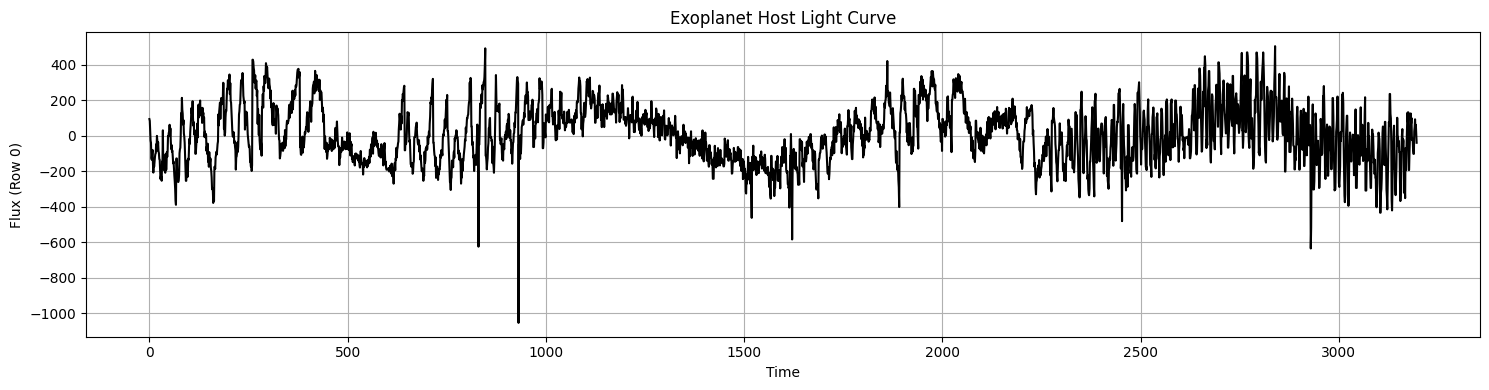

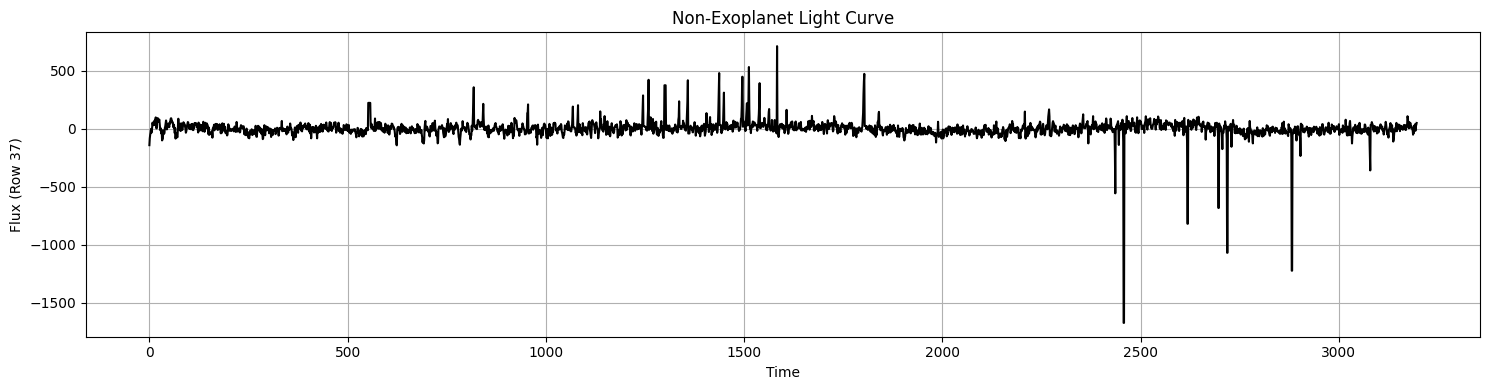

Preprocessing data (CPU steps)...
Original training set shape: (5087, 3197)
Original test set shape: (570, 3197)
Training labels distribution:
0    5050
1      37
Name: count, dtype: int64
Test labels distribution:
0    565
1      5
Name: count, dtype: int64
Scaling features using StandardScaler (CPU)...
CPU Preprocessing and Scaling complete.
Oversampling training data using RandomOverSampler (CPU)...
Training data shape after oversampling: (10100, 3197)
Training labels distribution after oversampling:
1    5050
0    5050
Name: count, dtype: int64
Training Logistic Regression model (CPU - scikit-learn)...
CPU Training completed in 312.20 seconds.

--- Evaluating Logistic Regression ---
Predicting on test data (CPU)...
CPU Prediction completed in 0.01 seconds.

Classification Report:
                   precision    recall  f1-score   support

 NO exoplanet (0)       0.99      0.96      0.98       565
YES exoplanet (1)       0.00      0.00      0.00         5

         accuracy         

/Users/jvmedhana/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


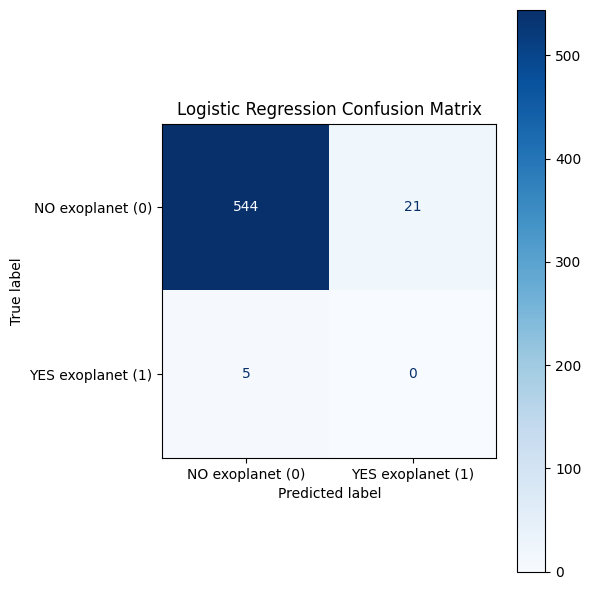


Script finished.


In [19]:
# --- Main Execution ---
if __name__ == "__main__":
    print("Starting Exoplanet Detection Baseline Script (CPU Only)...")
    df_train, df_test = load_data(TRAIN_CSV_PATH, TEST_CSV_PATH)

    if df_train is not None and df_test is not None:
        # Optional: Visualize example light curves
        exoplanet_idx = df_train[df_train['LABEL'] == 2].index[0]
        no_planet_idx = df_train[df_train['LABEL'] == 1].index[0]
        plot_light_curve(df_train, exoplanet_idx, title="Exoplanet Host Light Curve")
        plot_light_curve(df_train, no_planet_idx, title="Non-Exoplanet Light Curve")

        scaler, X_train_scaled, y_train, X_test_scaled, y_test = preprocess_and_scale_cpu(df_train, df_test)
        X_train_resampled, y_train_resampled = oversample_cpu(X_train_scaled, y_train)
        log_reg_model = train_logistic_regression(X_train_resampled, y_train_resampled)
        evaluate_model(log_reg_model, X_test_scaled, y_test, model_name="Logistic Regression")
        print("\nScript finished.")
    else:
        print("\nScript aborted due to data loading errors.")


### Exoplanet Detection using Logistic Regression with Row Scaling + Class Weighting

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time  # To measure training time

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [22]:
# --- Configuration ---
TRAIN_CSV_PATH = 'exoTrain.csv'
TEST_CSV_PATH = 'exoTest.csv'
RANDOM_STATE = 42

# --- Data Loading ---
def load_data(train_path, test_path):
    try:
        print(f"Loading training data from: {train_path}")
        df_train = pd.read_csv(train_path)
        print(f"Loading testing data from: {test_path}")
        df_test = pd.read_csv(test_path)
        print("Data loaded successfully.")
        return df_train, df_test
    except Exception as e:
        print(f"An error occurred during data loading: {e}")
        return None, None

In [23]:
# --- Data Preprocessing (CPU) ---
def preprocess_and_scale_cpu(df_train, df_test):
    print("Preprocessing data (CPU steps)...")
    X_train_raw = df_train.drop('LABEL', axis=1)
    y_train_raw = df_train['LABEL']
    X_test_raw = df_test.drop('LABEL', axis=1)
    y_test_raw = df_test['LABEL']

    y_train = (y_train_raw - 1).astype(int).values
    y_test = (y_test_raw - 1).astype(int).values

    print(f"Original training set shape: {X_train_raw.shape}")
    print(f"Original test set shape: {X_test_raw.shape}")
    print(f"Training labels distribution:\n{pd.Series(y_train).value_counts()}")
    print(f"Test labels distribution:\n{pd.Series(y_test).value_counts()}")

    print("Scaling features using StandardScaler (CPU)...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_raw.values)
    X_test_scaled = scaler.transform(X_test_raw.values)

    print("CPU Preprocessing and Scaling complete.")
    return scaler, X_train_scaled, y_train, X_test_scaled, y_test

In [24]:
# --- Model Training (CPU) ---
def train_logistic_regression_weighted(X_train, y_train):
    print("Training Logistic Regression with class_weight='balanced'...")
    model = LogisticRegression(max_iter=5000,  # increased to address convergence
                               random_state=RANDOM_STATE,
                               solver='liblinear',
                               class_weight='balanced')
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    print(f"Training completed in {end_time - start_time:.2f} seconds.")
    return model

# --- Model Evaluation ---
def evaluate_model(model, X_test, y_test, model_name="Model"):
    print(f"\n--- Evaluating {model_name} ---")
    try:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=["NO exoplanet (0)", "YES exoplanet (1)"]))

        print("\nConfusion Matrix:")
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NO exoplanet (0)", "YES exoplanet (1)"])

        fig, ax = plt.subplots(figsize=(6, 6))
        disp.plot(ax=ax, cmap='Blues', values_format='d')
        ax.set_title(f'{model_name} Confusion Matrix')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred during evaluation: {e}")

Starting Logistic Regression with Class Weighting
Loading training data from: exoTrain.csv
Loading testing data from: exoTest.csv
Data loaded successfully.
Preprocessing data (CPU steps)...
Original training set shape: (5087, 3197)
Original test set shape: (570, 3197)
Training labels distribution:
0    5050
1      37
Name: count, dtype: int64
Test labels distribution:
0    565
1      5
Name: count, dtype: int64
Scaling features using StandardScaler (CPU)...
CPU Preprocessing and Scaling complete.
Training Logistic Regression with class_weight='balanced'...
Training completed in 204.97 seconds.

--- Evaluating LogReg + Class Weight ---

Classification Report:
                   precision    recall  f1-score   support

 NO exoplanet (0)       0.99      0.96      0.98       565
YES exoplanet (1)       0.00      0.00      0.00         5

         accuracy                           0.96       570
        macro avg       0.50      0.48      0.49       570
     weighted avg       0.98      0.

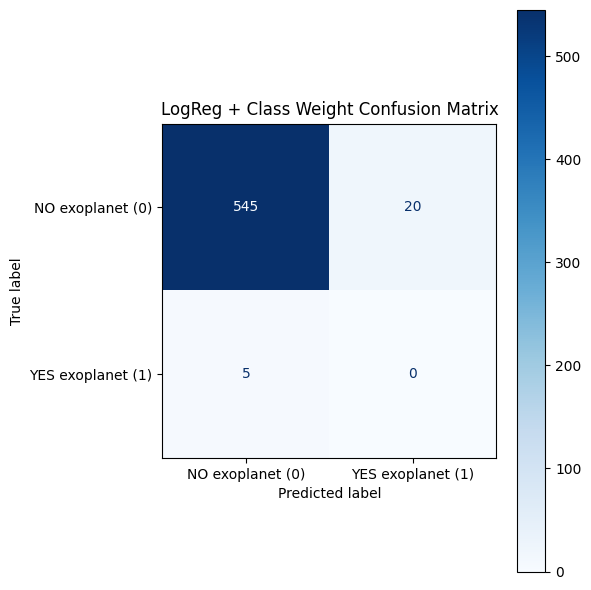

In [25]:
# --- Main Execution ---
if __name__ == "__main__":
    print("Starting Logistic Regression with Class Weighting")
    df_train, df_test = load_data(TRAIN_CSV_PATH, TEST_CSV_PATH)

    if df_train is not None and df_test is not None:
        scaler, X_train_scaled, y_train, X_test_scaled, y_test = preprocess_and_scale_cpu(df_train, df_test)
        model = train_logistic_regression_weighted(X_train_scaled, y_train)
        evaluate_model(model, X_test_scaled, y_test, model_name="LogReg + Class Weight")
    else:
        print("Script aborted due to data loading errors.")


### Logistic Regression with Column Scaling + PCA

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [28]:
# --- Configuration ---
TRAIN_CSV_PATH = 'exoTrain.csv'
TEST_CSV_PATH = 'exoTest.csv'
RANDOM_STATE = 42
PCA_COMPONENTS = 64

# --- Data Loading ---
def load_data(train_path, test_path):
    try:
        print(f"Loading training data from: {train_path}")
        df_train = pd.read_csv(train_path)
        print(f"Loading testing data from: {test_path}")
        df_test = pd.read_csv(test_path)
        print("Data loaded successfully.")
        return df_train, df_test
    except Exception as e:
        print(f"An error occurred during data loading: {e}")
        return None, None

In [29]:
# --- Data Preprocessing ---
def preprocess_colscale_pca(df_train, df_test, n_components):
    print("Preprocessing with Column Scaling + PCA...")
    X_train_raw = df_train.drop('LABEL', axis=1)
    y_train_raw = df_train['LABEL']
    X_test_raw = df_test.drop('LABEL', axis=1)
    y_test_raw = df_test['LABEL']

    y_train = (y_train_raw - 1).astype(int).values
    y_test = (y_test_raw - 1).astype(int).values

    # Column-wise scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_raw)
    X_test_scaled = scaler.transform(X_test_raw)

    # PCA dimensionality reduction
    pca = PCA(n_components=n_components, random_state=RANDOM_STATE)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    print(f"Reduced training shape: {X_train_pca.shape}")
    print(f"Reduced test shape: {X_test_pca.shape}")
    return X_train_pca, y_train, X_test_pca, y_test

In [30]:
# --- Model Training ---
def train_logistic_regression(X_train, y_train):
    print("Training Logistic Regression with PCA features...")
    model = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE, solver='liblinear')
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    print(f"Training completed in {end_time - start_time:.2f} seconds.")
    return model

In [31]:
# --- Evaluation ---
def evaluate_model(model, X_test, y_test, model_name="Logistic Regression PCA"):
    print(f"\n--- Evaluating {model_name} ---")
    try:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=["NO exoplanet (0)", "YES exoplanet (1)"]))

        print("\nConfusion Matrix:")
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NO exoplanet (0)", "YES exoplanet (1)"])

        fig, ax = plt.subplots(figsize=(6, 6))
        disp.plot(ax=ax, cmap='Blues', values_format='d')
        ax.set_title(f'{model_name} Confusion Matrix')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred during evaluation: {e}")

Starting Logistic Regression with PCA...
Loading training data from: exoTrain.csv
Loading testing data from: exoTest.csv
Data loaded successfully.
Preprocessing with Column Scaling + PCA...
Reduced training shape: (5087, 64)
Reduced test shape: (570, 64)
Training Logistic Regression with PCA features...
Training completed in 0.30 seconds.

--- Evaluating Logistic Regression PCA ---

Classification Report:
                   precision    recall  f1-score   support

 NO exoplanet (0)       0.99      1.00      1.00       565
YES exoplanet (1)       0.00      0.00      0.00         5

         accuracy                           0.99       570
        macro avg       0.50      0.50      0.50       570
     weighted avg       0.98      0.99      0.99       570


Confusion Matrix:


/Users/jvmedhana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jvmedhana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jvmedhana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

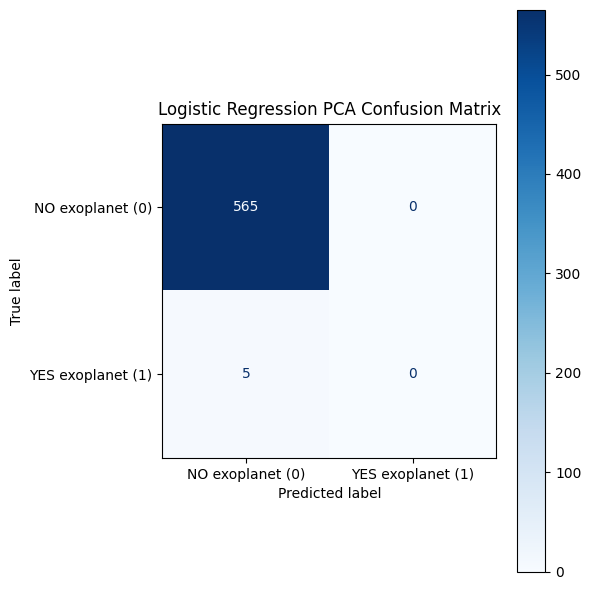

In [32]:
# --- Main Execution ---
if __name__ == "__main__":
    print("Starting Logistic Regression with PCA...")
    df_train, df_test = load_data(TRAIN_CSV_PATH, TEST_CSV_PATH)

    if df_train is not None and df_test is not None:
        X_train_pca, y_train, X_test_pca, y_test = preprocess_colscale_pca(df_train, df_test, PCA_COMPONENTS)
        model = train_logistic_regression(X_train_pca, y_train)
        evaluate_model(model, X_test_pca, y_test)
    else:
        print("Script aborted due to data loading errors.")

### Exoplanet Detection using Logistic Regression with Row Scaling + SMOTE

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [35]:
# --- Configuration ---
TRAIN_CSV_PATH = 'exoTrain.csv'
TEST_CSV_PATH = 'exoTest.csv'
RANDOM_STATE = 42

# --- Data Loading ---
def load_data(train_path, test_path):
    try:
        print(f"Loading training data from: {train_path}")
        df_train = pd.read_csv(train_path)
        print(f"Loading testing data from: {test_path}")
        df_test = pd.read_csv(test_path)
        print("Data loaded successfully.")
        return df_train, df_test
    except Exception as e:
        print(f"An error occurred during data loading: {e}")
        return None, None

In [36]:
# --- Preprocessing ---
def preprocess_and_scale_cpu(df_train, df_test):
    print("Preprocessing data (Row Scaling)...")
    X_train_raw = df_train.drop('LABEL', axis=1)
    y_train_raw = df_train['LABEL']
    X_test_raw = df_test.drop('LABEL', axis=1)
    y_test_raw = df_test['LABEL']

    y_train = (y_train_raw - 1).astype(int).values
    y_test = (y_test_raw - 1).astype(int).values

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_raw)
    X_test_scaled = scaler.transform(X_test_raw)

    return X_train_scaled, y_train, X_test_scaled, y_test

In [37]:
# --- SMOTE Oversampling ---
def apply_smote(X_train_scaled, y_train):
    print("Applying SMOTE to training data...")
    smote = SMOTE(random_state=RANDOM_STATE)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
    print(f"Training data shape after SMOTE: {X_train_smote.shape}")
    print(f"Training label distribution after SMOTE:\n{pd.Series(y_train_smote).value_counts()}")
    return X_train_smote, y_train_smote

# --- Model Training ---
def train_logistic_regression(X_train, y_train):
    print("Training Logistic Regression with SMOTE data...")
    model = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE, solver='liblinear')
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    print(f"Training completed in {end_time - start_time:.2f} seconds.")
    return model

In [38]:
# --- Evaluation ---
def evaluate_model(model, X_test, y_test, model_name="Logistic Regression with SMOTE"):
    print(f"\n--- Evaluating {model_name} ---")
    try:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=["NO exoplanet (0)", "YES exoplanet (1)"]))

        print("\nConfusion Matrix:")
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NO exoplanet (0)", "YES exoplanet (1)"])

        fig, ax = plt.subplots(figsize=(6, 6))
        disp.plot(ax=ax, cmap='Blues', values_format='d')
        ax.set_title(f'{model_name} Confusion Matrix')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred during evaluation: {e}")

Starting Logistic Regression with SMOTE...
Loading training data from: exoTrain.csv
Loading testing data from: exoTest.csv
Data loaded successfully.
Preprocessing data (Row Scaling)...
Applying SMOTE to training data...
Training data shape after SMOTE: (10100, 3197)
Training label distribution after SMOTE:
1    5050
0    5050
Name: count, dtype: int64
Training Logistic Regression with SMOTE data...
Training completed in 323.99 seconds.

--- Evaluating Logistic Regression with SMOTE ---

Classification Report:
                   precision    recall  f1-score   support

 NO exoplanet (0)       0.99      0.96      0.97       565
YES exoplanet (1)       0.00      0.00      0.00         5

         accuracy                           0.95       570
        macro avg       0.50      0.48      0.49       570
     weighted avg       0.98      0.95      0.97       570


Confusion Matrix:


/Users/jvmedhana/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


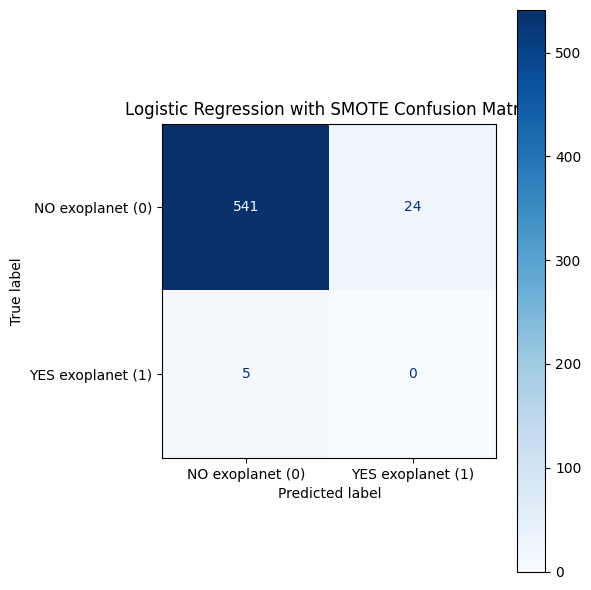

In [39]:
# --- Main ---
if __name__ == "__main__":
    print("Starting Logistic Regression with SMOTE...")
    df_train, df_test = load_data(TRAIN_CSV_PATH, TEST_CSV_PATH)

    if df_train is not None and df_test is not None:
        X_train_scaled, y_train, X_test_scaled, y_test = preprocess_and_scale_cpu(df_train, df_test)
        X_train_smote, y_train_smote = apply_smote(X_train_scaled, y_train)
        model = train_logistic_regression(X_train_smote, y_train_smote)
        evaluate_model(model, X_test_scaled, y_test)
    else:
        print("Script aborted due to data loading errors.")

### Logistic Regression with Column Scaling + SMOTE

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE


In [42]:
# --- Configuration ---
TRAIN_CSV_PATH = 'exoTrain.csv'
TEST_CSV_PATH = 'exoTest.csv'
RANDOM_STATE = 42

# --- Data Loading ---
def load_data(train_path, test_path):
    try:
        print(f"Loading training data from: {train_path}")
        df_train = pd.read_csv(train_path)
        print(f"Loading testing data from: {test_path}")
        df_test = pd.read_csv(test_path)
        print("Data loaded successfully.")
        return df_train, df_test
    except Exception as e:
        print(f"An error occurred during data loading: {e}")
        return None, None

In [43]:
# --- Column Scaling ---
def preprocess_colscale(df_train, df_test):
    print("Applying Column-wise Scaling (StandardScaler)...")
    X_train_raw = df_train.drop('LABEL', axis=1)
    y_train_raw = df_train['LABEL']
    X_test_raw = df_test.drop('LABEL', axis=1)
    y_test_raw = df_test['LABEL']

    y_train = (y_train_raw - 1).astype(int).values
    y_test = (y_test_raw - 1).astype(int).values

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_raw)
    X_test_scaled = scaler.transform(X_test_raw)

    return X_train_scaled, y_train, X_test_scaled, y_test

In [44]:
# --- SMOTE ---
def apply_smote(X_train_scaled, y_train):
    print("Applying SMOTE to training data...")
    smote = SMOTE(random_state=RANDOM_STATE)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
    print(f"Training data shape after SMOTE: {X_train_smote.shape}")
    print(f"Training label distribution after SMOTE:\n{pd.Series(y_train_smote).value_counts()}")
    return X_train_smote, y_train_smote

In [45]:
# --- Train Logistic Regression ---
def train_logistic_regression(X_train, y_train):
    print("Training Logistic Regression on Column Scaled + SMOTE data...")
    model = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE, solver='liblinear')
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    print(f"Training completed in {end_time - start_time:.2f} seconds.")
    return model

In [46]:
# --- Evaluation ---
def evaluate_model(model, X_test, y_test, model_name="Logistic Regression ColScale + SMOTE"):
    print(f"\n--- Evaluating {model_name} ---")
    try:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=["NO exoplanet (0)", "YES exoplanet (1)"]))

        print("\nConfusion Matrix:")
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NO exoplanet (0)", "YES exoplanet (1)"])

        fig, ax = plt.subplots(figsize=(6, 6))
        disp.plot(ax=ax, cmap='Blues', values_format='d')
        ax.set_title(f'{model_name} Confusion Matrix')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred during evaluation: {e}")

Starting Logistic Regression with Column Scaling + SMOTE...
Loading training data from: exoTrain.csv
Loading testing data from: exoTest.csv
Data loaded successfully.
Applying Column-wise Scaling (StandardScaler)...
Applying SMOTE to training data...
Training data shape after SMOTE: (10100, 3197)
Training label distribution after SMOTE:
1    5050
0    5050
Name: count, dtype: int64
Training Logistic Regression on Column Scaled + SMOTE data...
Training completed in 324.55 seconds.

--- Evaluating Logistic Regression ColScale + SMOTE ---

Classification Report:
                   precision    recall  f1-score   support

 NO exoplanet (0)       0.99      0.96      0.97       565
YES exoplanet (1)       0.00      0.00      0.00         5

         accuracy                           0.95       570
        macro avg       0.50      0.48      0.49       570
     weighted avg       0.98      0.95      0.97       570


Confusion Matrix:


/Users/jvmedhana/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


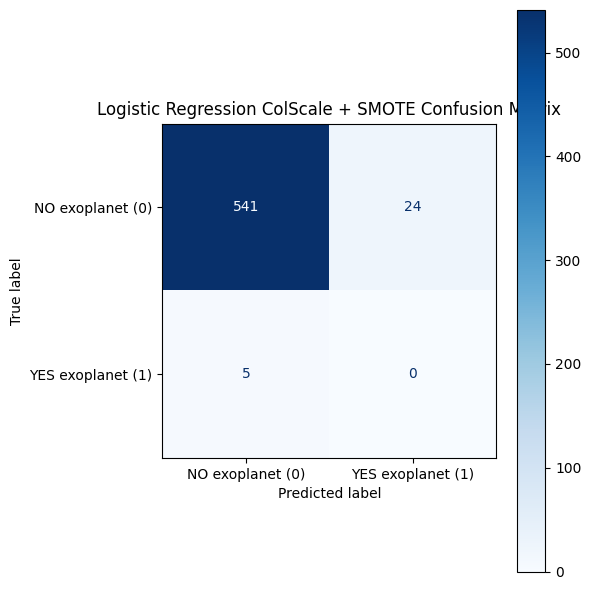

In [47]:
# --- Main ---
if __name__ == "__main__":
    print("Starting Logistic Regression with Column Scaling + SMOTE...")
    df_train, df_test = load_data(TRAIN_CSV_PATH, TEST_CSV_PATH)

    if df_train is not None and df_test is not None:
        X_train_scaled, y_train, X_test_scaled, y_test = preprocess_colscale(df_train, df_test)
        X_train_smote, y_train_smote = apply_smote(X_train_scaled, y_train)
        model = train_logistic_regression(X_train_smote, y_train_smote)
        evaluate_model(model, X_test_scaled, y_test)
    else:
        print("Script aborted due to data loading errors.")
